# Домашнее задание 3 - ЗБЧ и ЦПТ

__Оценки-баллы__: 
- 1: 0
- 2: 1
- 3: 2
- 4: 3
- 5: 4-5
- 6: 6-7
- 7: 8-9
- 8: 10-11
- 9: 12-13
- 10: 14-16

__DL (срок сдачи ДЗ)__: 22.12.2021 22:00. После этого срока работы НЕ будут приниматься

__Формат сдачи - в личный аккаунт telegram: @zhuikov_vv__: hw6_7_ivanov_i_i.ipynb

### Задание 1 [2] - Что такое ЗБЧ и ЦПТ?

ЗБЧ - закон больших чисел: среднее значение конечной выборки из фиксированного распределения близко к математическому ожиданию этого распределения

ЦПТ - центральная предельная теорема: сумма достаточно большого количества слабо зависимых случайных величин, имеющих примерно одинаковые масштабы, имеет распределение, близкое к нормальному

### Задание 2 [2] - для чего нужно распределение Хи-квадрат?

Чаще всего используется для анализа категориальных данных. Используется для статистических тестов проверки значимости расхождения наблюдаемых и теоретических частот. 

### Задание 3 [2] - нарисуйте распределение Фишера на графике

In [94]:
import numpy as np
from matplotlib import pyplot as plt  
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

В зависимости от степеней свободы графики распределения Фишера получаются разными

In [103]:
# Сначала написал фукнцию, которая делает из двух распределений хи квадрат 
# распределние Фишера. Ну работает она так же, как встроенная в нампай, только медленней

def get_fisher(n, m, size):
    x1 = np.random.chisquare(n,size)
    x2 = np.random.chisquare(m,size)
    x1_new = [value / n for value in x1]
    x2_new = [value / m for value in x2]
    fisher = [b / m for b,m in zip(x1_new, x2_new)]
    return np.array(fisher)

<AxesSubplot:ylabel='Density'>

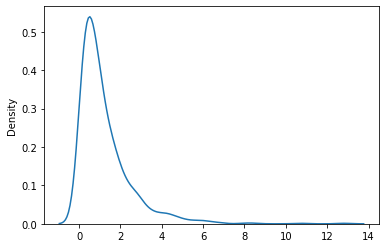

In [183]:
# Функция get_fisher
fisher_1_2 = get_fisher(3, 10, 1000)
sns.distplot(fisher_1_2, hist=False)

<AxesSubplot:ylabel='Density'>

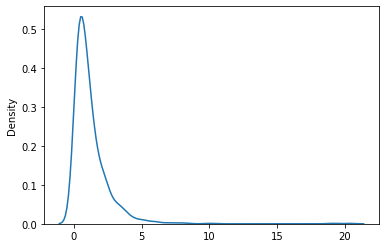

In [182]:
# Функция numpy
f_3_10 = np.random.f(3, 10, 1000)
sns.distplot(f_3_10, hist=False)

In [99]:
f_3_10 = np.random.f(3, 10, 1000)
f_1_2 = np.random.f(1, 2, 1000)
f_10_3 = np.random.f(10, 3, 1000)
f_100_100 = np.random.f(100, 100, 1000)

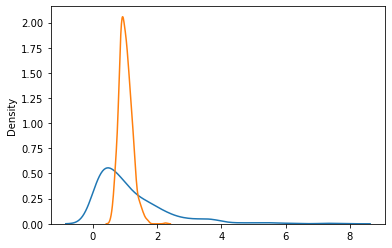

In [100]:
sns.distplot(f_3_10, hist=False)
# sns.distplot(f_1_2, hist=False, rug=True)
# sns.distplot(f_10_3, hist=False, rug=True)
sns.distplot(f_100_100, hist=False)
plt.show()

<AxesSubplot:ylabel='Density'>

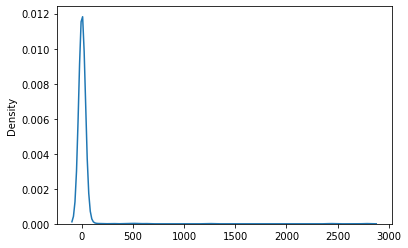

In [101]:
sns.distplot(f_1_2, hist=False)

<AxesSubplot:ylabel='Density'>

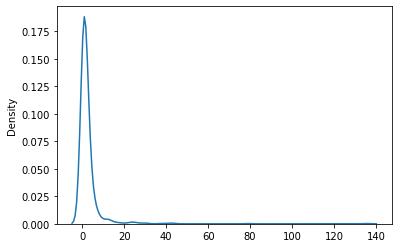

In [102]:
sns.distplot(f_10_3, hist=False)

### Задание 4 [5] - В этом задании нужно убедиться, что ЦПТ действительно работает

Создайте случайную величину из любого выбранного вами распределения, покажите, что ЦПТ работает для этого распределения

In [107]:
import scipy.stats as sts

In [114]:
n = 100_000
uniform = sts.uniform(-1, 2)

Сгенерируем 4 массива случайных величин

In [115]:
x1 = uniform.rvs(n)
x2 = uniform.rvs(n)
x3 = uniform.rvs(n)
x4 = uniform.rvs(n)

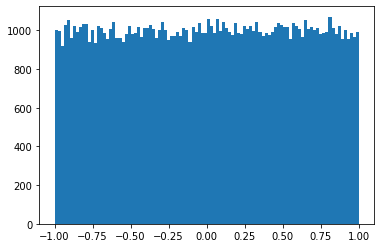

In [116]:
plt.hist(x1, bins=100)
plt.show()

Построим график их суммы

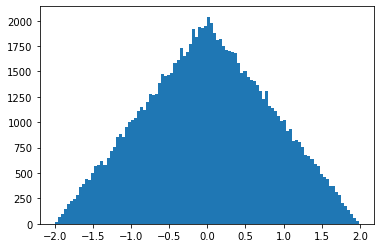

In [117]:
plt.hist(x1 + x2, bins=100)
plt.show()

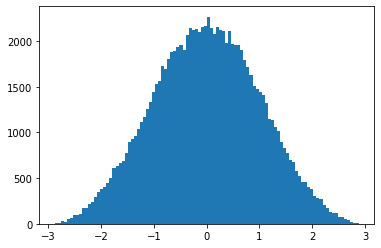

In [118]:
plt.hist(x1 + x2 + x3, bins=100)
plt.show()

Наложим график нормального распределения на график

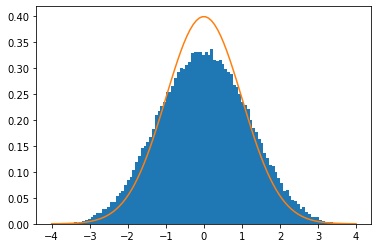

In [142]:
plt.hist(x1 + x2 + x3 + x4, bins=100, density=True)
x = np.linspace(-4, 4, 100)
pdf = sts.norm().pdf(x)
plt.plot(x, pdf);

plt.show()

### Задание 5 [5] - В этом задании нужно убедиться, что ЗБЧ действительно работает

Приведите пример работы ЗБЧ

Бросаем кубик. Возможные значения: 1..6. Мат ожидание: 3.5

Генерируем 10 бросков

In [170]:
dice = [random.randint(1, 6) for _ in range(10)]

In [171]:
np.mean(dice)

2.5

Мат ожидание не сошлось, бросков мало

Сгенерируем побольше бросков

In [174]:
dice_large = [random.randint(1, 6) for _ in range(10_000)]

In [175]:
np.mean(dice_large)

3.505

Довольно точно

Сделаем еще чуть больше бросков 

In [178]:
super_ultra_large_mega_giga_dice = [random.randint(1, 6) for _ in range(10_000_000)]

In [179]:
np.mean(super_ultra_large_mega_giga_dice)

3.5005875

Так немного точней. 

---
---